In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("data/student.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

Performing some data checks


In [12]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
df.nunique()      #To check unique value of each column

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
print("Categories in 'gender' variable:",end=" ")
print(df["gender"].unique())

print("Categories in 'race_ethnicity' variable:", end=" ")
print(df["race_ethnicity"].unique())

print("Categories in 'parental_level_of_education' variable:",end=" ")
print(df["parental_level_of_education"].unique())

print("Categories in 'lunch' variable:",end=" ")
print(df["lunch"].unique())

print("Categories in 'test_preparation_course' variable:",end=" ")
print(df["test_preparation_course"].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [22]:
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

print("We have {} numerical features : {}".format(len(numerical_features),numerical_features))
print(" We have {} categorical features :{}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
 We have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for "Total Score" and "Average"

In [24]:
df["total_score"]=df['math_score'] + df['reading_score'] + df['writing_score']
df["average"]=df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
reading_full=df[df["reading_score"]==100]["average"].count()
writing_full=df[df["writing_score"]==100]["average"].count()
math_full=df[df["math_score"]==100]["average"].count()
print(f"Number of students with full marks in Maths:{math_full}")
print(f"Number of students with full marks in Reading:{reading_full}")
print(f"Number of students with full marks in Writing:{writing_full}")

Number of students with full marks in Maths:7
Number of students with full marks in Reading:17
Number of students with full marks in Writing:14


In [27]:
reading_less_30=df[df["reading_score"] <= 30]["average"].count()
writing_less_30=df[df["writing_score"] <= 30]["average"].count()
math_less_30=df[df["math_score"] <= 30]["average"].count()

print(f"Number of students with less than 30 marks in Maths:{math_less_30}")
print(f"Number of students with less than 30 marks in Reading:{reading_less_30}")
print(f"Number of students with less than 30 marks in writing:{writing_less_30}")

Number of students with less than 30 marks in Maths:16
Number of students with less than 30 marks in Reading:8
Number of students with less than 30 marks in writing:10


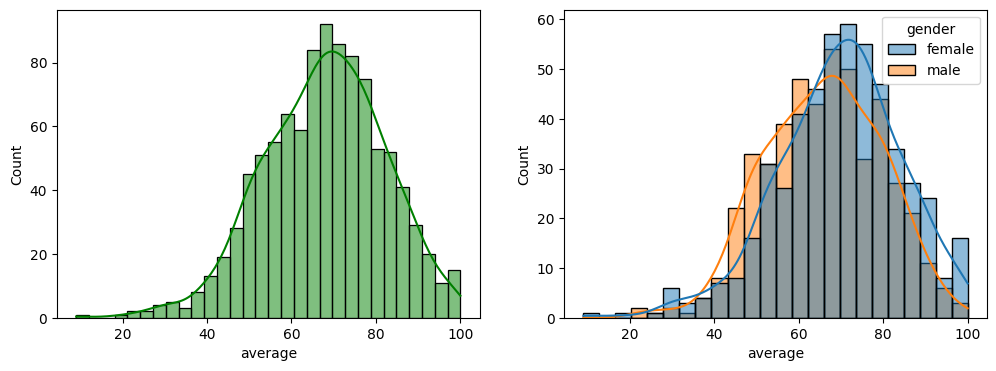

In [29]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
sns.histplot(df["average"], ax=ax, bins=30, kde=True, color="g")

ax = fig.add_subplot(122)
sns.histplot(data=df, x="average", kde=True, hue="gender")  
plt.show()


In [34]:
pip install pandas-profiling

  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.2 requires visions[type_image_path]<0.8.0,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [36]:
from pandas_profiling import ProfileReport  # Correct import
prf = ProfileReport(df)  # Now it works
prf.to_file("Output.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 51.79it/s]
